### Table of Contents

1. [Data Preparation](#lr1)
2. [Default Logistic Regression Model](#lr2)
3. [Logistic Regression with cross-validated Grid Search](#lr3)
4. [Logistic Regression with best parameters](#lr4)


### Data Preparation <a id='lr1'></a>

#### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, accuracy_score, recall_score, plot_precision_recall_curve
from sklearn.dummy import DummyClassifier

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [83]:
def plot_roc_curve(test, model_probs, naive_probs):
    fpr, tpr, _ = roc_curve(test, naive_probs)
    plt.plot(fpr, tpr, linestyle = '--', label = 'Baseline')
    fpr, tpr, _ = roc_curve(test, model_probs)
    plt.plot(fpr, tpr, marker = '.', label = 'Logistic Regression', markersize = 0.1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.title('ROC Curve')
    plt.show()
    
def plot_pr_curve(test, model_probs):
    no_skill = len(test[test == 1]) / len(test)
    
    plt.plot( [no_skill, no_skill], linestyle = '--', label = 'Baseline')
    
    precision, recall, _ = precision_recall_curve(test, model_probs)
    plt.plot(recall, precision, marker = '.', label = 'Logistic Regression', markersize = 0.1)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision - Recall Curve')
    plt.legend()
    plt.show()

#### Setting up Data

In [3]:
#Reading in our data
df = pd.read_csv('../data/loan_rf_features.csv')

In [3]:
#Setting up X and y
X = pd.get_dummies(df.drop(columns = ['loan_status']))
y = df['loan_status']

In [4]:
#Train, test, split with scaling
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state = 42,
                                                    stratify = y,
                                                    test_size= 0.2)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [9]:
#Baseline Model
dummy_model = DummyClassifier(strategy= 'stratified')
dummy_model.fit(X_train, y_train)
naive_preds = dummy_model.predict(X_test)
naive_probs = dummy_model.predict_proba(X_test)[:,1]

In [6]:
accuracy_score(y_test, naive_preds)

0.6817796000030314

In [12]:
recall_score(y_test, naive_preds)

0.19487824876532617

In [13]:
precision_score(y_test, naive_preds)

0.19537746850446386

In [10]:
precision, recall, _ = precision_recall_curve(y_test, naive_probs)

In [11]:
auc(recall, precision)

0.2765208047521551

### Default Logistic Regression Model <a id='lr2'></a>

In [46]:
#Fitting and creating predictions
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr_test_probs = lr.predict_proba(X_test)[:,1]
lr_train_probs = lr.predict_proba(X_train)[:,1]
lr_test_preds = lr.predict(X_test)
lr_train_preds = lr.predict(X_train)

In [21]:
#Training data accuracy score
lr.score(X_train, y_train)

0.9020365514471281

In [20]:
#Testing data accuracy score
lr.score(X_test, y_test)

0.9015202613091223

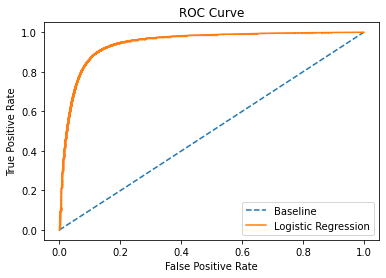

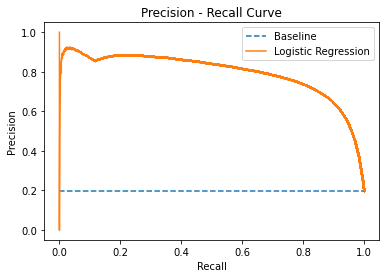

Training Data ROC-AUC score logistic regression (default model): 0.9470
Testing Data ROC-AUC score logistic regression (default model): 0.9458
Training Data PR-AUC score logistic regression (default model): 0.8016
Testing Data PR-AUC score logistic regression (default model): 0.7968


In [84]:
#Plotting relevant curves and printing evaluation metrics
plot_roc_curve(y_test, lr_test_probs, naive_preds)
plot_pr_curve(y_test, lr_test_probs)

print(f'Training Data ROC-AUC score logistic regression (default model): {roc_auc_score(y_train, lr_train_probs):.4f}')
print(f'Testing Data ROC-AUC score logistic regression (default model): {roc_auc_score(y_test, lr_test_probs):.4f}')

precision, recall, _ = precision_recall_curve(y_train, lr_train_probs)
train_pr_auc = auc(recall, precision)
print(f'Training Data PR-AUC score logistic regression (default model): {auc(recall, precision):.4f}')

precision, recall, _ = precision_recall_curve(y_test, lr_test_probs)
test_pr_auc = auc(recall, precision)
print(f'Testing Data PR-AUC score logistic regression (default model): {auc(recall, precision):.4f}')

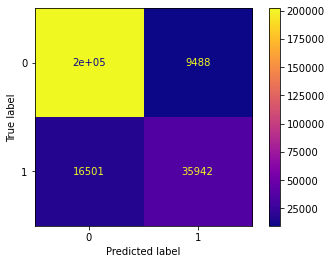

In [29]:
#Confusion Matrix
lr_cm = confusion_matrix(y_test, lr_test_preds)
lr_cm_plot = ConfusionMatrixDisplay(lr_cm, display_labels = lr.classes_)
lr_cm_plot.plot(cmap = 'plasma');

### Logistic Regression with GridSearchCV <a id='lr3'></a>

In [74]:
#Fitting model with different parameters
lr_params = {
    'C' : [0.001, 0.01, 0.1, 1, 10, 100],
    'class_weight' : [None, 'balanced', {0 : 20, 1: 80}],
    'max_iter'     : [100, 1000, 4000],
}

lr_gs = GridSearchCV(LogisticRegression(),
                     param_grid = lr_params,
                     cv = 3,
                     verbose = 2)

lr_gs.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END ...........C=0.001, class_weight=None, max_iter=100; total time=   1.8s
[CV] END ...........C=0.001, class_weight=None, max_iter=100; total time=   1.8s
[CV] END ...........C=0.001, class_weight=None, max_iter=100; total time=   1.8s
[CV] END ..........C=0.001, class_weight=None, max_iter=1000; total time=   1.8s
[CV] END ..........C=0.001, class_weight=None, max_iter=1000; total time=   1.8s
[CV] END ..........C=0.001, class_weight=None, max_iter=1000; total time=   1.8s
[CV] END ..........C=0.001, class_weight=None, max_iter=4000; total time=   1.8s
[CV] END ..........C=0.001, class_weight=None, max_iter=4000; total time=   2.0s
[CV] END ..........C=0.001, class_weight=None, max_iter=4000; total time=   1.9s
[CV] END .......C=0.001, class_weight=balanced, max_iter=100; total time=   2.2s
[CV] END .......C=0.001, class_weight=balanced, max_iter=100; total time=   2.1s
[CV] END .......C=0.001, class_weight=balanced,

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced', {0: 20, 1: 80}],
                         'max_iter': [100, 1000, 4000]},
             verbose=2)

In [75]:
#Generating predictions 
gs_test_probs = lr_gs.predict_proba(X_test)[:,1]
gs_train_probs = lr_gs.predict_proba(X_train)[:,1]

gs_train_preds = lr_gs.predict(X_train)
gs_test_preds = lr_gs.predict(X_test)

In [95]:
#Printing accuracy score, recall score, and best parameters found via GridSearch
print(f'Training data accuracy score: {lr_gs.score(X_train, y_train)}')
print(f'Testing data accuracy score: {lr_gs.score(X_test, y_test)}')
print(f' Testing data recall_score: {(y_test, gs_test_preds)}')
print(f' Testing data precision_score: {(y_test, gs_test_preds)}')
print(f' Best Parameters:
      {lr_gs.best_params_}')

0.9020393934111905
0.9015202613091223
0.6853536220277253
0.7911512216596962
{'C': 10, 'class_weight': None, 'max_iter': 100}


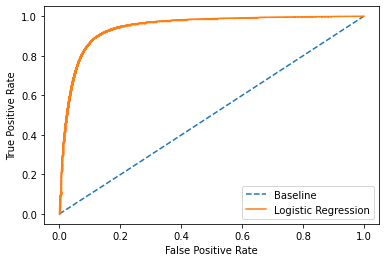

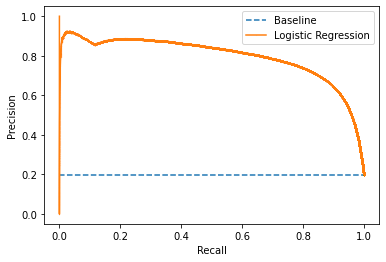

Training Data ROC-AUC score logistic regression (default model): 0.947
Testing Data ROC-AUC score logistic regression (default model): 0.946
Training Data PR-AUC score logistic regression (default model): 0.802
Testing Data PR-AUC score logistic regression (default model): 0.797


In [78]:
#Plotting relevant curves and printing evaluation metrics
plot_roc_curve(y_test, gs_test_probs, naive_preds)
plot_pr_curve(y_test, gs_test_probs)

print(f'Training Data ROC-AUC score logistic regression (default model): {roc_auc_score(y_train, gs_train_probs):.4f}')
print(f'Testing Data ROC-AUC score logistic regression (default model): {roc_auc_score(y_test, gs_test_probs):.4f}')

precision, recall, _ = precision_recall_curve(y_train, gs_train_probs)
print(f'Training Data PR-AUC score logistic regression (default model): {auc(recall, precision):.4f}')
precision, recall, _ = precision_recall_curve(y_test, gs_test_probs)
print(f'Testing Data PR-AUC score logistic regression (default model): {auc(recall, precision):.4f}')

In [63]:
#Generating values for validation curve, checking c-parameter
c_param = [0.001, 0.01, 0.1, 1, 10, 100]

train_scores, test_scores = validation_curve(
        estimator=lr_gs.best_estimator_, X=X_train, y=y_train, param_name="C", param_range=c_param,
        cv=5, scoring="accuracy", n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


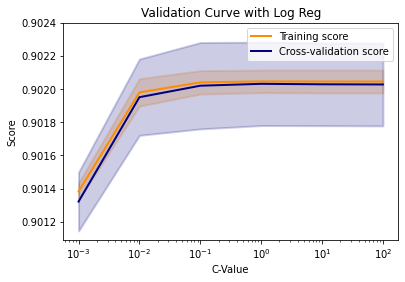

In [73]:
#Generating validation curve, evaluating c-value
plt.title("Validation Curve with Log Reg")
plt.xlabel('C-Value')
plt.ylabel("Score")
plt.ylim(0.90109, 0.9024)
lw = 2
plt.semilogx(c_param, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(c_param, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(c_param, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(c_param, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

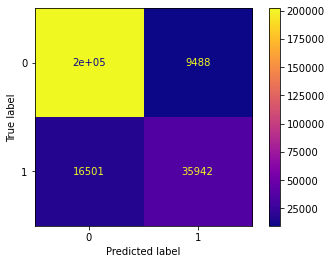

In [100]:
#Confusion Matrix for Logistic Regression + GridSearchCV
lr_gs_cm = confusion_matrix(y_test, gs_test_preds)
lr_gs_cm_plot = ConfusionMatrixDisplay(lr_gs_cm, display_labels = lr_gs.classes_)
lr_gs_cm_plot.plot(cmap = 'plasma');

### Logistic Regression with Best Parameters <a id='lr4'></a>

In [102]:
#Fitting model and generating predictions
best_lr = LogisticRegression(C = 10, class_weight= None, max_iter = 100)
best_lr.fit(X_train, y_train)

lr_train_preds = best_lr.predict(X_train)
lr_test_preds = best_lr.predict(X_test)

lr_train_probs = best_lr.predict_proba(X_train)[:,1]
lr_test_probs = best_lr.predict_proba(X_test)[:,1]


In [103]:
#Testing and training data accuracy scores
print(best_lr.score(X_train, y_train))
print(best_lr.score(X_test, y_test))

0.9020393934111905
0.9015202613091223


In [109]:
#Creating dataframe with log reg coefficients
odds = np.exp(best_lr.coef_[0])
pd.DataFrame(odds,
             X.columns,
             columns = ['coef']).sort_values(by = 'coef', ascending = False)

,coef
term,1.589137
installment,1.507263
dti,1.225020
emp_length_unreported,1.142226
credit_file_age,1.107341
total_acc,1.059719
purpose_small_business,1.059057
home_ownership_RENT,1.030793
inq_last_6mths,1.022393
purpose_medical,1.019403


In [ ]:
#Exporting for evaluation
lr_probs = pd.DataFrame(lr_test_probs, columns = ['lr_probs'])
lr_probs.to_csv('../data/lr_probs.csv')